#  Web Scraping and Data Analysis Project
## Wikipedia: List of Countries by Smartphone Penetration

**Course:** Web Scraping and Data Processing  
**Student:** Pradeep Kumar
**Institution:** MSc Computer Science & Data Science – Paris -ESILV 
**Objective:** Extract, clean, and analyze smartphone penetration data from Wikipedia.

In [1]:
# Importing all required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: for clean display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Step 1: Fetch the Wikipedia page (with headers to avoid 403)
url = "https://en.wikipedia.org/wiki/List_of_countries_by_smartphone_penetration"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/115.0 Safari/537.36"
}

response = requests.get(url, headers=headers)

# Check status
print("Status Code:", response.status_code)

# If 200, means success
if response.status_code == 200:
    print("✅ Page fetched successfully!")
else:
    print("⚠️ Failed to retrieve page.")



Status Code: 200
✅ Page fetched successfully!


In [3]:
# Step 2: Parse HTML and extract the main table
from bs4 import BeautifulSoup

# Parse the page with BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Find all tables on the page
tables = soup.find_all("table", {"class": "wikitable"})

print(f"Number of tables found: {len(tables)}")

# Convert the first table into a pandas DataFrame
from io import StringIO
df = pd.read_html(StringIO(str(tables[0])))[0]

# Display the first few rows
df.head()


Number of tables found: 9


,Rank,Country/Region,Total population,Smartphone users,Smartphone penetration
0,1,PRC,1430.00M,974.69M,68.4%
1,2,India,1420.00M,659.00M,46.5%
2,3,United States,338.29M,276.14M,81.6%
3,4,Indonesia,275.50M,187.70M,68.1%
4,5,Brazil,215.31M,143.43M,66.6%


In [4]:
# Step 3: Clean and prepare the data

# Make a copy to avoid modifying the original accidentally
data = df.copy()

# Standardize column names (remove spaces and lowercase)
data.columns = [col.strip().replace(" ", "_").lower() for col in data.columns]

# Display columns to verify
print("✅ Columns after renaming:", list(data.columns))

# Remove unwanted characters and convert numeric columns
data["total_population"] = data["total_population"].replace("M", "", regex=True).astype(float)
data["smartphone_users"] = data["smartphone_users"].replace("M", "", regex=True).astype(float)
data["smartphone_penetration"] = data["smartphone_penetration"].replace("%", "", regex=True).astype(float)

# Check data types
print("\n📊 Data types:")
print(data.dtypes)

# Show cleaned data preview
data.head()


✅ Columns after renaming: ['rank', 'country/region', 'total_population', 'smartphone_users', 'smartphone_penetration']

📊 Data types:
rank                        int64
country/region             object
total_population          float64
smartphone_users          float64
smartphone_penetration    float64
dtype: object


,rank,country/region,total_population,smartphone_users,smartphone_penetration
0,1,PRC,1430.00,974.69,68.4
1,2,India,1420.00,659.00,46.5
2,3,United States,338.29,276.14,81.6
3,4,Indonesia,275.50,187.70,68.1
4,5,Brazil,215.31,143.43,66.6


In [5]:
# Step 7.1: Enhanced Basic Exploration

# --- Dataset info ---
print("✅ Basic Dataset Information:\n")
print(f"Total countries/regions in dataset: {data.shape[0]}\n")

# --- Clean summary statistics (exclude rank column) ---
summary = data.drop(columns=["rank"]).describe().round(2)

print("📊 Summary Statistics:\n")
display(
    summary.style.set_caption("Summary of Smartphone Penetration Dataset")
    .format(precision=2)
    .background_gradient(cmap="Blues", axis=None)
)

# --- Key metrics ---
avg_penetration = data["smartphone_penetration"].mean()
median_penetration = data["smartphone_penetration"].median()
std_penetration = data["smartphone_penetration"].std()

print(f"🌍 Average smartphone penetration worldwide: {avg_penetration:.2f}%")
print(f"📈 Median smartphone penetration: {median_penetration:.2f}%")
print(f"📉 Standard deviation (spread): {std_penetration:.2f}%")

# --- Highest and lowest penetration countries ---
max_country = data.loc[data["smartphone_penetration"].idxmax(), "country/region"]
max_value = data["smartphone_penetration"].max()

min_country = data.loc[data["smartphone_penetration"].idxmin(), "country/region"]
min_value = data["smartphone_penetration"].min()

print(f"\n🏆 Highest penetration: {max_country} ({max_value:.2f}%)")
print(f"⚠️  Lowest penetration: {min_country} ({min_value:.2f}%)")



✅ Basic Dataset Information:

Total countries/regions in dataset: 10

📊 Summary Statistics:



,total_population,smartphone_users,smartphone_penetration
count,10.00,10.00,10.00
mean,452.96,267.95,61.40
std,516.63,305.08,17.20
min,123.95,72.90,31.00
25%,162.36,86.86,50.25
50%,227.18,124.94,67.35
75%,322.59,254.03,72.30
max,1430.00,974.69,81.60


🌍 Average smartphone penetration worldwide: 61.40%
📈 Median smartphone penetration: 67.35%
📉 Standard deviation (spread): 17.20%

🏆 Highest penetration: United States (81.60%)
⚠️  Lowest penetration: Pakistan (31.00%)


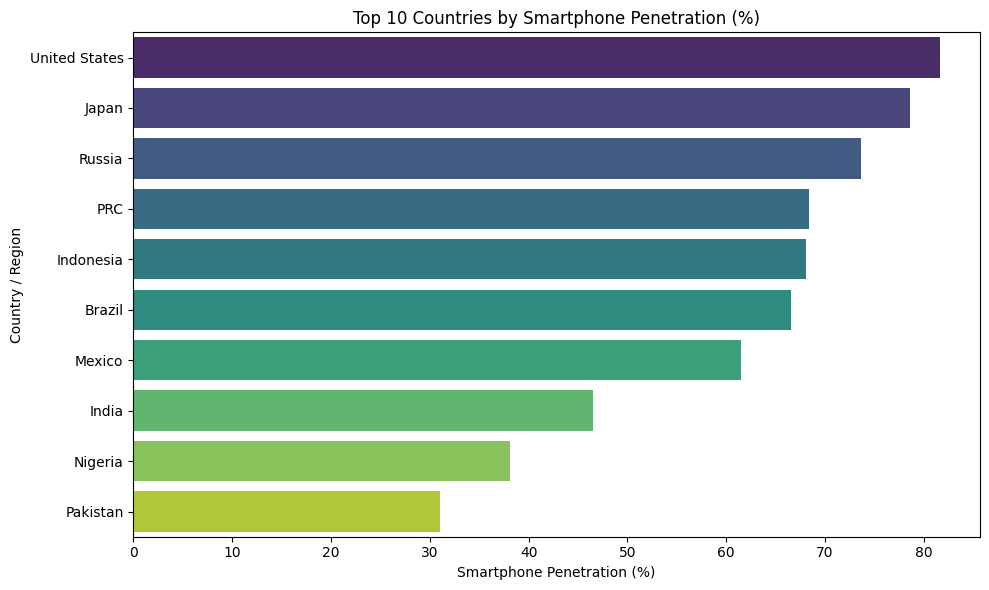

In [5]:
plt.figure(figsize=(10,6))
sns.barplot(
    y="country/region",
    x="smartphone_penetration",
    data=data.nlargest(10, "smartphone_penetration"),
    hue="country/region",
    dodge=False,
    palette="viridis",
    legend=False
)
plt.title("Top 10 Countries by Smartphone Penetration (%)")
plt.xlabel("Smartphone Penetration (%)")
plt.ylabel("Country / Region")
plt.tight_layout()

# Save chart before showing
plt.savefig("../output/top10_smartphone_penetration.png", dpi=150)
plt.show()



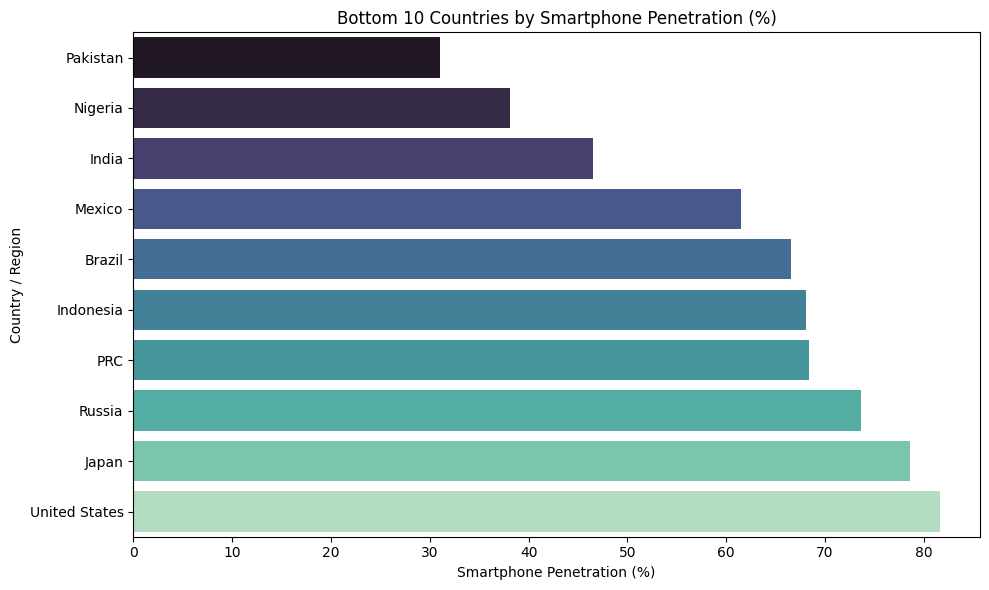

In [6]:
# Step 7.3: Bottom 10 countries by smartphone penetration
plt.figure(figsize=(10,6))
sns.barplot(
    y="country/region",
    x="smartphone_penetration",
    data=data.nsmallest(10, "smartphone_penetration"),
    hue="country/region",
    dodge=False,
    palette="mako",
    legend=False
)
plt.title("Bottom 10 Countries by Smartphone Penetration (%)")
plt.xlabel("Smartphone Penetration (%)")
plt.ylabel("Country / Region")
plt.tight_layout()

# Save chart before showing
plt.savefig("../output/bottom10_smartphone_penetration.png", dpi=150)
plt.show()


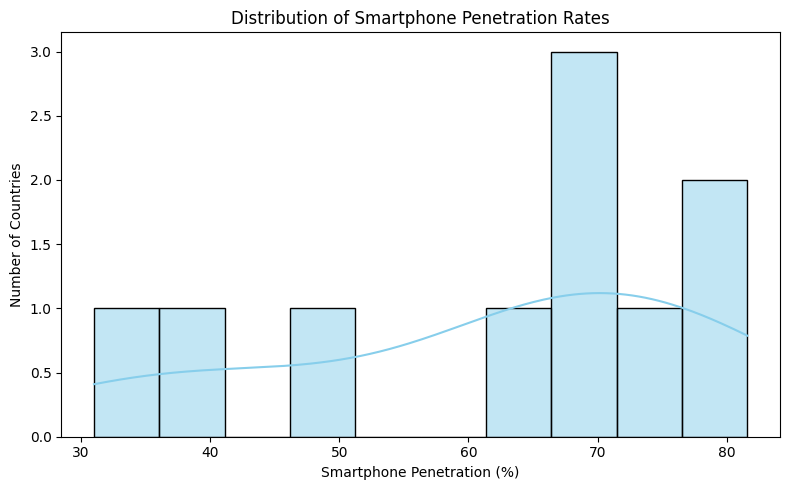

In [7]:
# Step 7.4: Distribution of smartphone penetration rates
plt.figure(figsize=(8,5))
sns.histplot(
    data=data,
    x="smartphone_penetration",
    bins=10,
    kde=True,
    color="skyblue"
)
plt.title("Distribution of Smartphone Penetration Rates")
plt.xlabel("Smartphone Penetration (%)")
plt.ylabel("Number of Countries")
plt.tight_layout()

# Save chart before showing
plt.savefig("../output/Distribution_Smartphone_Penetration_Rates.png", dpi=150)
plt.show()


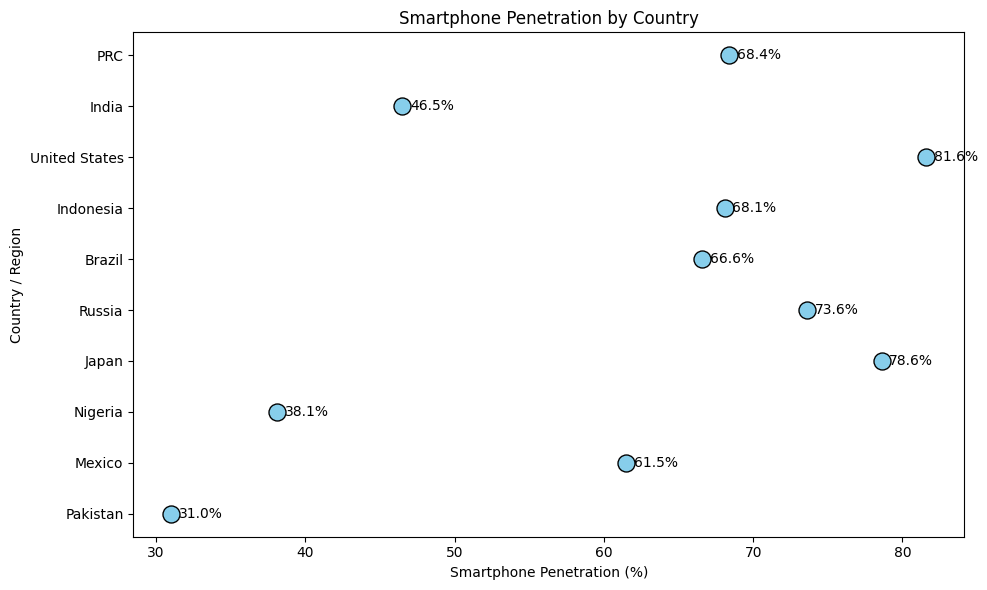

In [8]:
# Alternative to histogram — scatter plot with labels
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data,
    x="smartphone_penetration",
    y="country/region",
    s=150,          # dot size
    color="skyblue",
    edgecolor="black"
)

# Add labels on the dots
for i in range(data.shape[0]):
    plt.text(
        x=data["smartphone_penetration"].iloc[i] + 0.5,   # offset label slightly
        y=i,
        s=f"{data['smartphone_penetration'].iloc[i]:.1f}%",
        va="center"
    )

plt.title("Smartphone Penetration by Country")
plt.xlabel("Smartphone Penetration (%)")
plt.ylabel("Country / Region")
plt.tight_layout()

# Save chart before showing
plt.savefig("../output/Smartphone_Penetration_by_Country.png", dpi=150)
plt.show()


In [9]:
# Re-create the range_counts variable if needed
bins = [0, 30, 50, 70, 90, 100]
labels = ["0–30%", "30–50%", "50–70%", "70–90%", "90–100%"]

data["penetration_range"] = pd.cut(
    data["smartphone_penetration"], bins=bins, labels=labels, include_lowest=True
)

range_counts = data["penetration_range"].value_counts().sort_index()


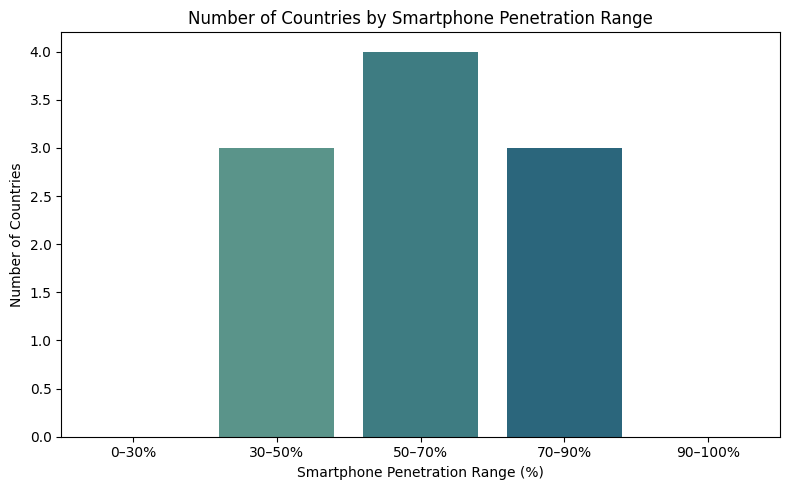

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=range_counts.index,
    y=range_counts.values,
    hue=range_counts.index,   # add hue to silence warning
    dodge=False,
    palette="crest",
    legend=False
)
plt.title("Number of Countries by Smartphone Penetration Range")
plt.xlabel("Smartphone Penetration Range (%)")
plt.ylabel("Number of Countries")
plt.tight_layout()

# Save chart before showing
plt.savefig("../output/Number_of_countries_Smartphone_Penetration_Range.png", dpi=150)
plt.show()


In [11]:
# Recreate the penetration_range column
bins = [0, 30, 50, 70, 90, 100]
labels = ["0–30%", "30–50%", "50–70%", "70–90%", "90–100%"]

data["penetration_range"] = pd.cut(
    data["smartphone_penetration"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Optional: verify
print("✅ penetration_range column recreated successfully!")
print(data[["country/region", "smartphone_penetration", "penetration_range"]].head())


✅ penetration_range column recreated successfully!
  country/region  smartphone_penetration penetration_range
0            PRC                    68.4            50–70%
1          India                    46.5            30–50%
2  United States                    81.6            70–90%
3      Indonesia                    68.1            50–70%
4         Brazil                    66.6            50–70%


In [12]:
# Step 7.6: Final KPI Summary

print("📊 Final Key Performance Indicators (KPIs)\n")

print(f"🌍 Average smartphone penetration: {data['smartphone_penetration'].mean():.2f}%")
print(f"📈 Median smartphone penetration: {data['smartphone_penetration'].median():.2f}%")
print(f"📉 Standard deviation (spread): {data['smartphone_penetration'].std():.2f}%")

print(f"\n👥 Total smartphone users (all 10 countries): {data['smartphone_users'].sum():,.2f} million")
print(f"👤 Average smartphone users per country: {data['smartphone_users'].mean():,.2f} million")

# Highest and lowest penetration
max_country = data.loc[data["smartphone_penetration"].idxmax(), "country/region"]
max_value = data["smartphone_penetration"].max()

min_country = data.loc[data["smartphone_penetration"].idxmin(), "country/region"]
min_value = data["smartphone_penetration"].min()

print(f"\n🏆 Highest penetration: {max_country} ({max_value:.2f}%)")
print(f"⚠️  Lowest penetration: {min_country} ({min_value:.2f}%)")

# Number of countries per penetration range
print("\n📶 Countries by penetration range:")
print(data["penetration_range"].value_counts().sort_index())


📊 Final Key Performance Indicators (KPIs)

🌍 Average smartphone penetration: 61.40%
📈 Median smartphone penetration: 67.35%
📉 Standard deviation (spread): 17.20%

👥 Total smartphone users (all 10 countries): 2,679.45 million
👤 Average smartphone users per country: 267.95 million

🏆 Highest penetration: United States (81.60%)
⚠️  Lowest penetration: Pakistan (31.00%)

📶 Countries by penetration range:
penetration_range
0–30%      0
30–50%     3
50–70%     4
70–90%     3
90–100%    0
Name: count, dtype: int64


In [13]:
print("📌 Additional KPIs\n")

# Penetration spread/range
rng = data["smartphone_penetration"].max() - data["smartphone_penetration"].min()
print(f"Range of penetration: {rng:.2f} p.p.")

# Top-3 average vs Bottom-3 average
top3 = data.nlargest(3, "smartphone_penetration")["smartphone_penetration"].mean()
bot3 = data.nsmallest(3, "smartphone_penetration")["smartphone_penetration"].mean()
print(f"Top-3 avg penetration: {top3:.2f}%")
print(f"Bottom-3 avg penetration: {bot3:.2f}%")

# Users-weighted penetration (approx proxy)
weighted = (data["smartphone_users"].sum() / data["total_population"].sum()) * 100
print(f"Users-weighted penetration (proxy): {weighted:.2f}%")

# Share of countries above 70%
share70 = (data["smartphone_penetration"] >= 70).mean() * 100
print(f"Countries ≥70% penetration: {share70:.1f}%")

# Median vs mean delta
delta = data["smartphone_penetration"].median() - data["smartphone_penetration"].mean()
print(f"Median – Mean (skew indicator): {delta:.2f} p.p.")

# Penetration quartiles already visible in describe(); add IQR
q3 = data["smartphone_penetration"].quantile(0.75)
q1 = data["smartphone_penetration"].quantile(0.25)
print(f"IQR (Q3–Q1) penetration: {q3 - q1:.2f} p.p.")


📌 Additional KPIs

Range of penetration: 50.60 p.p.
Top-3 avg penetration: 77.93%
Bottom-3 avg penetration: 38.53%
Users-weighted penetration (proxy): 59.15%
Countries ≥70% penetration: 30.0%
Median – Mean (skew indicator): 5.95 p.p.
IQR (Q3–Q1) penetration: 22.05 p.p.


### 🧮 Additional KPI Insights

- **Range of penetration** – Difference between highest and lowest adoption (digital gap indicator).  
- **Top-3 vs Bottom-3 average** – Shows the disparity between most and least connected nations.  
- **Users-weighted penetration** – Approximates global smartphone usage weighted by population.  
- **Countries ≥70% penetration** – Indicates how many nations are in the high-adoption band.  
- **Median–Mean delta** – Reveals skewness; positive value means fewer high-adoption outliers.  
- **IQR (Q3–Q1)** – Spread of middle 50% of countries; helps identify data concentration zone.  

In [14]:
# Save cleaned dataset to /data folder
data.to_csv("../data/smartphone_penetration_clean.csv", index=False)
print("✅ Cleaned dataset saved successfully: /data/smartphone_penetration_clean.csv")

✅ Cleaned dataset saved successfully: /data/smartphone_penetration_clean.csv
